In [247]:
import numpy as np
import healpy as hp
import pymaster as nmt
import matplotlib.pyplot as plt

In [248]:
# Inputs

Nside = 64
lmax = 2*Nside-1
Nlbin = 10
Nsims = 500

Npixs = hp.nside2npix(Nside)

bC = nmt.NmtBin.from_lmax_linear(lmax, nlb=Nlbin, is_Dell=False)
bD = nmt.NmtBin.from_lmax_linear(lmax, nlb=Nlbin, is_Dell=True)
leff = b.get_effective_ells()
Nbins = len(leff)

In [265]:
# Load and bin DL_cmb

bands = ['LFT_L1-040', 'MFT_M1-195', 'HFT_H3-402']

CL_cmb = [np.load('CL_cmb_%s_nside64.npy' % (band)) for band in bands]
CL_cmb_binned = np.zeros((3, Nsims, Nbins))
DL_cmb_binned = np.zeros((3, Nsims, Nbins))

for i in range(len(bands)):
    for k in range(Nsims):
        CL_cmb_binned[i, k] = bC.bin_cell(CL_cmb[i][k, :2*Nside])
        DL_cmb_binned[i, k] = bD.bin_cell(CL_cmb[i][k, :2*Nside])

# Theoretical lensing CMB

ell = np.arange(2, 2*Nside)

CL_lens = hp.read_cl('../power_spectra/Cls_Planck2018_r0.fits')[2, 2:2*Nside]
DL_lens = CL_lens * ell*(ell+1) / (2*np.pi)

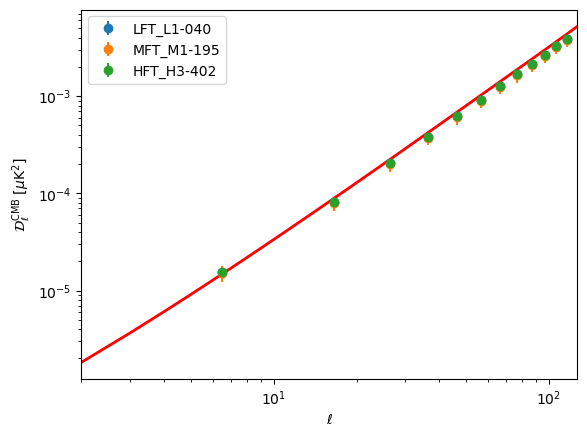

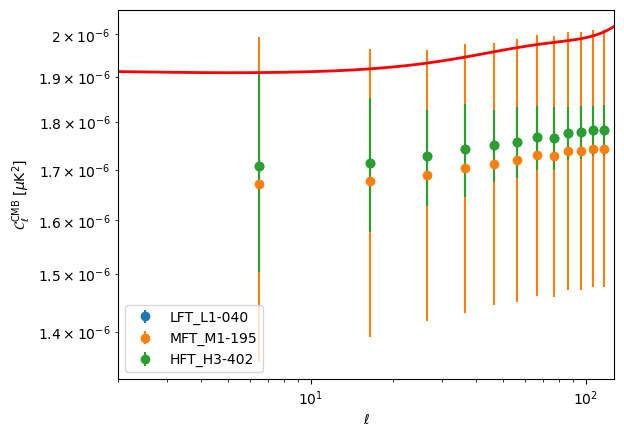

In [266]:
for i in range(len(bands)):
    plt.errorbar(leff, np.mean(DL_cmb_binned[i], axis=0), yerr=np.std(DL_cmb_binned[i], axis=0), fmt='o', label=bands[i])
plt.loglog(ell, DL_lens, linewidth=2, color='red')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{D}_\ell^{\rm CMB}$ [$\mu$K$^2$]')
plt.xlim(2, 2*Nside-1)
plt.legend()
plt.show()

for i in range(len):
    plt.errorbar(leff, np.mean(CL_cmb_binned[i], axis=0), yerr=np.std(CL_cmb_binned[i], axis=0), fmt='o', label=bands[i])
plt.loglog(ell, CL_lens, linewidth=2, color='red')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{C}_\ell^{\rm CMB}$ [$\mu$K$^2$]')
plt.xlim(2, 2*Nside-1)
plt.legend()
plt.show()